In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline


In [40]:
A = np.load('Data Arrays\\Debugging Arrays\\A.npy')
def f(t_idx):
    fig, ax = plt.subplots(figsize=(14, 10))
    plt.imshow(np.abs(A[:, A.shape[1]//2, :, int(t_idx), 1].T))
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("z")
    

widgets.interact(f, t_idx=(0, A.shape[3]-1, 1));

interactive(children=(IntSlider(value=24, description='t_idx', max=49), Output()), _dom_classes=('widget-inter…

In [48]:
G = np.load('Data Arrays\\Debugging Arrays\\G.npy')
def f(t_idx):
    fig, ax = plt.subplots(figsize=(14, 6))
    plt.imshow(np.abs(G[:, G.shape[1]//2, :,int(t_idx)].T))
    plt.xlabel('x')
    plt.ylabel('z')
    plt.colorbar()

widgets.interact(f, t_idx=(0, G.shape[3]-1, 1));

interactive(children=(IntSlider(value=24, description='t_idx', max=49), Output()), _dom_classes=('widget-inter…

In [50]:
A = np.load('Data Arrays\\Debugging Arrays\\A.npy')
G = np.load('Data Arrays\\Debugging Arrays\\G.npy')
A_abs = np.abs(A[:, A.shape[1]//2, :, 0])
G_abs = np.abs(G[:, G.shape[1]//2, :, 0])
max_A_abs = np.max(A_abs)
max_G_abs = np.max(G_abs)


def f(x_idx):
    fig, ax = plt.subplots(2, 1, figsize=(14, 6))
    ax[0].plot(A_abs[int(x_idx), :], label='A')
    ax[0].set_ylim((0, max_A_abs))
    ax[0].legend()
    ax[1].plot(G_abs[int(x_idx), :], label='G', color='orange')
    ax[1].set_ylim((0, max_G_abs))
    ax[1].legend()

widgets.interact(f, x_idx=(0, G.shape[0]-1, 1));

interactive(children=(IntSlider(value=99, description='x_idx', max=199), Output()), _dom_classes=('widget-inte…

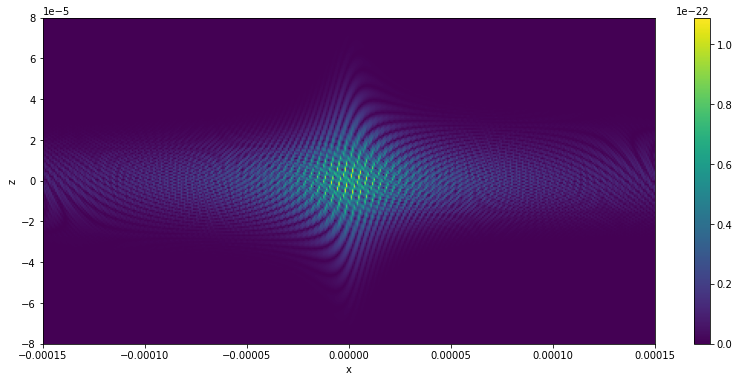

In [11]:
A = np.load('Data Arrays\\Debugging Arrays\\A.npy')
tan_alpha = np.tan(0.443)

fig, ax = plt.subplots(figsize=(14, 6))
plt.imshow(np.abs(A[:, A.shape[1]//2, :,0, 2].T), extent=[-150e-6,150e-6,-80e-6,80e-6])
plt.xlabel("x")
plt.ylabel("z")
# plt.plot([0, 100e-6], [0, tan_alpha * 100e-6], color='red')
plt.colorbar();

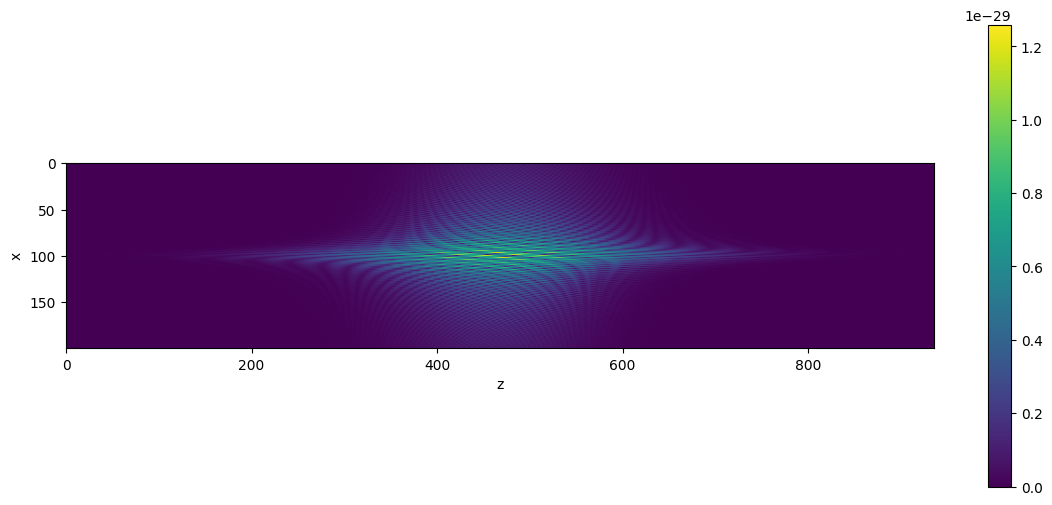

In [51]:
G = np.load('Data Arrays\\Debugging Arrays\\G.npy')
fig, ax = plt.subplots(figsize=(14, 6))
plt.imshow(np.abs(G[:, G.shape[1]//2, :,0]))
plt.colorbar()
plt.xlabel("z")
plt.ylabel("x");

Text(0, 0.5, 'x')

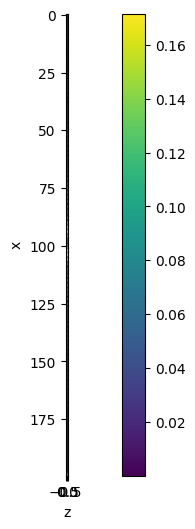

In [52]:
phi_values = np.load('Data Arrays\\Debugging Arrays\\phi_values.npy')
fig, ax = plt.subplots(figsize=(14, 6))
plt.imshow(np.abs(np.gradient(phi_values[:, :, 1], axis=0)))
plt.colorbar()
plt.xlabel("z")
plt.ylabel("x")

In [5]:
phi_values = np.load('Data Arrays\\Debugging Arrays\\phi_values.npy')
def f(t_idx):
    fig, ax = plt.subplots(figsize=(14, 6))
    plt.plot(np.abs(phi_values[:, phi_values.shape[1]//2, int(t_idx)].T))
#     plt.colorbar()

widgets.interact(f, t_idx=(0, phi_values.shape[2]-1, 1));

interactive(children=(IntSlider(value=1, description='t_idx', max=2), Output()), _dom_classes=('widget-interac…

In [8]:
phi_values = np.load('Data Arrays\\Debugging Arrays\\phi_values.npy')
phase_mask = np.exp(1j * phi_values)
PHASE_MASK = np.fft.fft(phase_mask, axis=2, norm='forward')

def f(x_idx):
    fig, ax = plt.subplots(2, 1, figsize=(14, 6))
    ax[0].plot(phi_values[x_idx, phi_values.shape[1]//2, :])
    ax[1].plot(np.abs(PHASE_MASK[x_idx, PHASE_MASK.shape[1]//2, :]))

def g(x_idx):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(np.angle(phase_mask[x_idx, phi_values.shape[1]//2, :]))
    
def h(angle=0):
    x_real = np.arange(phase_mask.shape[2])
    y = phase_mask[phase_mask.shape[0] // 2, phase_mask.shape[1] // 2, :]
    y_real = np.real(y)
    y_image = np.imag(y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_real, y_real, y_image)
    ax.plot([x_real[0], x_real[-1]], [0, 0], [0, 0], linestyle='-')
    ax.set_xlabel('t')
    ax.set_ylabel('y_real')
    ax.set_zlabel('y_imag')
    ax.set_ylim((-1.1, 1.1))
    ax.set_zlim((-1.1, 1.1))
    ax.view_init(30, angle)
    plt.show()

# widgets.interact(f, x_idx=(0, phase_mask.shape[0]-1, 1));
# widgets.interact(g, x_idx=(0, phi_values.shape[0]-1, 1));
widgets.interact(h, angle=(0, 360, 1));

interactive(children=(IntSlider(value=0, description='angle', max=360), Output()), _dom_classes=('widget-inter…

Amplitude of the zero'th frequency: 0.9954350902082253


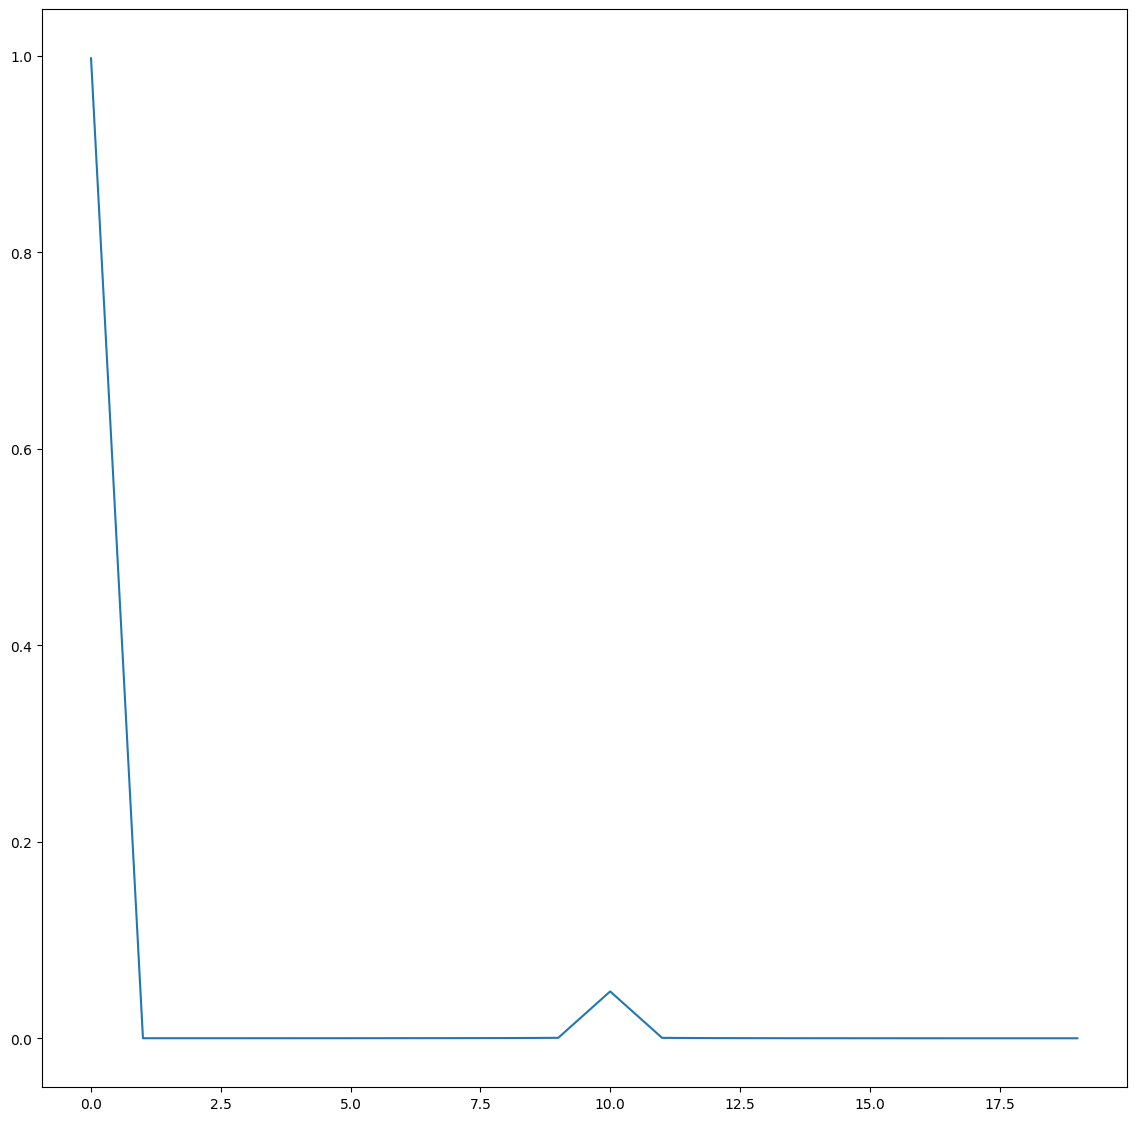

In [28]:
fig, ax = plt.subplots(figsize=(14, 14))
phi_values = np.load('Data Arrays\\Debugging Arrays\\phi_values.npy')
phase_mask = np.exp(1j * phi_values)
PHASE_MASK = np.fft.fft(phase_mask, axis=2, norm='forward')
plt.plot(np.abs(PHASE_MASK[PHASE_MASK.shape[0]//2, PHASE_MASK.shape[1]//2, 0:20]))
print(f"Amplitude of the zero'th frequency: {np.abs(PHASE_MASK[0,0,0])**2}")

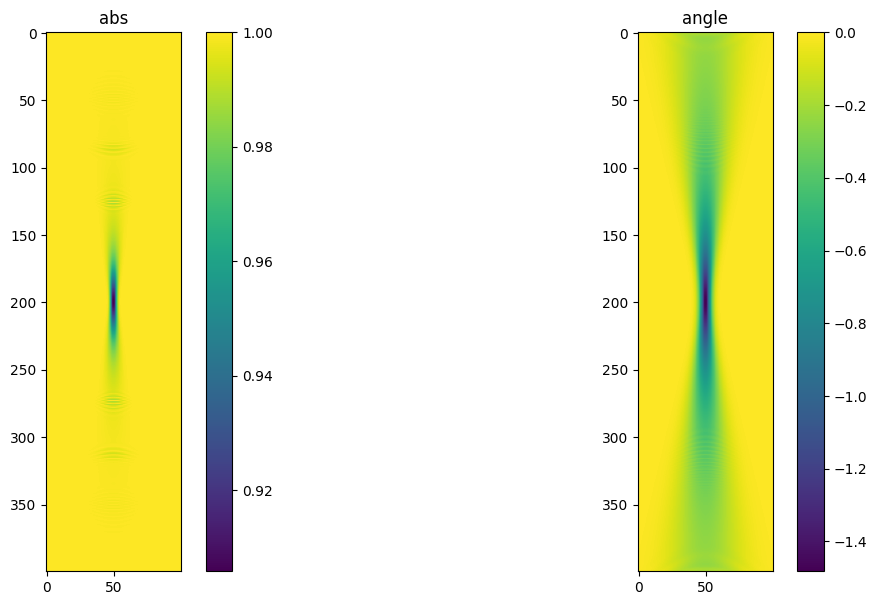

In [9]:
M = np.load('Data Arrays\\Debugging Arrays\\phase_amplitude_mask.npy')
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
im1 = ax[0].imshow(np.abs(M));
im2 = ax[1].imshow(np.angle(M));
plt.colorbar(im1, ax=ax[0])
plt.colorbar(im2, ax=ax[1])
ax[0].set_title("abs")
ax[1].set_title("angle");